# Spam Message Detection

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
from wordcloud import WordCloud

## Data Cleaning and Analysis

In [3]:
df = pd.read_csv('spam.tsv', sep='\t')
df.sample(5)

,label,message,length,punct
5223,ham,If I die I want u to have all my stuffs.,40,1
3884,ham,"Gumby's has a special where a &lt;#&gt; "" che...",95,9
3785,ham,Dear got train and seat mine lower seat,39,0
1058,ham,Ard 515 like dat. Y?,20,2
3051,ham,Ok,2,0


In [4]:
#missing values
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
#duplicate values
df.duplicated().sum()

403

In [6]:
#dropping the duplicate values
df = df.drop_duplicates(keep = 'first')
df.shape

(5169, 4)

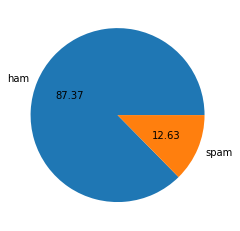

In [7]:
#distribution representation
plt.pie(df['label'].value_counts(), labels = ['ham', 'spam'], autopct = '%.2f')
plt.show()

In [8]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

ham = ham.sample(spam.shape[0])

#balanced data
data = ham.append(spam, ignore_index = True)
data.shape

(1306, 4)

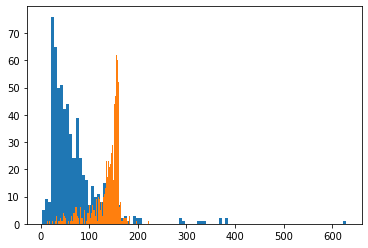

In [9]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100)
plt.show()

## Data Preprocessing

In [10]:
#downloading nltk dependencies
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/lucifer/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/lucifer/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lucifer/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /home/lucifer/nltk_data...


True

In [11]:
def text_transform(txt):
  #converting to lowercase
  txt = txt.lower()

  #tokenization
  txt = nltk.word_tokenize(txt)

  #removing special charecters
  tmp = []
  for token in txt:
    if token.isalnum():
      tmp.append(token)

  txt = tmp[:]

  #removing stop words and punctutations
  tmp = []
  for token in txt:
    if token not in nltk.corpus.stopwords.words('english') and token not in string.punctuation:
      tmp.append(token)

  txt = tmp[:]

  #lemmatization
  lemmatizer = nltk.stem.WordNetLemmatizer()

  tmp = []
  for token in txt:
    tmp.append(lemmatizer.lemmatize(token, 'v'))

  return " ".join(tmp)

In [12]:
data['trans_message'] = data['message'].apply(text_transform)

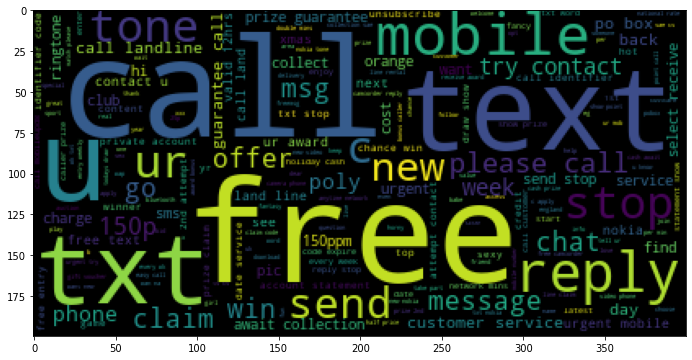

In [13]:
wc = WordCloud()

#word cloud for spam
spam_wc = wc.generate(data[data['label'] == 'spam']['trans_message'].str.cat(sep = " "))

plt.figure(figsize = (12, 6))
plt.imshow(spam_wc)

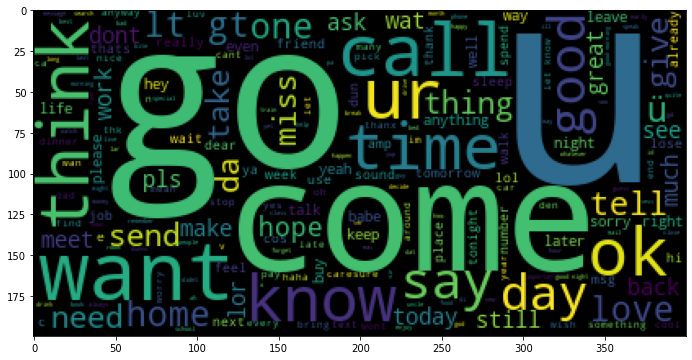

In [14]:
#word cloud for ham
spam_wc = wc.generate(data[data['label'] == 'ham']['trans_message'].str.cat(sep = " "))

plt.figure(figsize = (12, 6))
plt.imshow(spam_wc)

## Model Fitting

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data['trans_message'], data['label'], test_size = 0.3, shuffle = True, stratify = data['label'])

#pipeline
pipe = Pipeline([('tfid', TfidfVectorizer()), ('rfc', RandomForestClassifier(n_estimators = 100))])

pipe.fit(X_train, y_train)

#prediction
y_pred = pipe.predict(X_test)

#confusion matrix
print(confusion_matrix(y_test, y_pred), '\n')

#accuracy
accuracy_score(y_test, y_pred)

[[194   2]
 [ 15 181]] 



0.9566326530612245